In [204]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Question 1

a)

In [205]:
def cross_entropy(p, q):
    p = np.array(p)
    q = np.array(q)
    
    p = np.where(p > 0, p, 1e-10)
    q = np.where(q > 0, q, 1e-10)
    
    ce = -np.sum(p * np.log2(q))
    return ce

Cross Entropy of the image pair: 7.2734


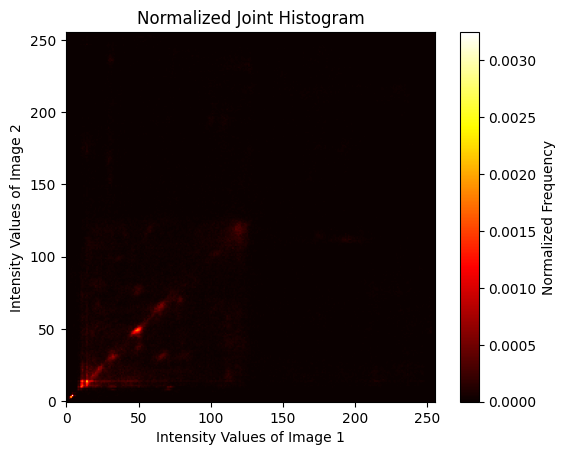

In [206]:
def normalized_joint_histogram(image1, image2, bins=256):
    joint_histogram, x, y = np.histogram2d(image1.flatten(), image2.flatten(), bins=bins, range=[[0, 256], [0, 256]], density=True)
    return joint_histogram


def calculate_cross_entropy(image1_path, image2_path):
    image1 = Image.open(image1_path).convert('L')
    image2 = Image.open(image2_path).convert('L')
    
    image1 = np.array(image1)
    image2 = np.array(image2)
    
    marginal_hist1, _ = np.histogram(image1.flatten(), bins=256, range=[0, 256], density=True)
    marginal_hist2, _ = np.histogram(image2.flatten(), bins=256, range=[0, 256], density=True)
    
    ce = cross_entropy(marginal_hist1, marginal_hist2)
    
    joint_hist = normalized_joint_histogram(image1, image2)
    
    return ce, joint_hist

image1_path = "left.png"  
image2_path = "right.png"

img_cross_entropy, joint_hist = calculate_cross_entropy(image1_path, image2_path)

print(f"Cross Entropy of the image pair: {img_cross_entropy:.4f}")

plt.imshow(joint_hist, origin='lower', cmap='hot')
plt.colorbar(label='Normalized Frequency')
plt.title('Normalized Joint Histogram')
plt.xlabel('Intensity Values of Image 1')
plt.ylabel('Intensity Values of Image 2')
plt.show()


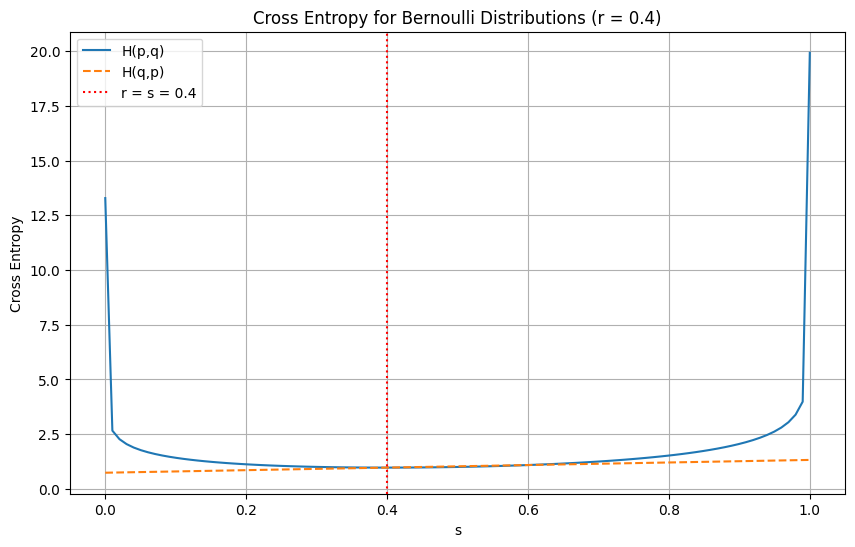

In [207]:
def explore_kl(r, s_values):
    
    p = [r, 1-r]
    
    H_pq = []
    H_qp = []
    for s in s_values:
        q = [s, 1 - s]
        H_pq.append(cross_entropy(p, q))
        H_qp.append(cross_entropy(q, p))
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(s_values, H_pq, label='H(p,q)')
    plt.plot(s_values, H_qp, label='H(q,p)', linestyle='--')
    plt.title(f'Cross Entropy for Bernoulli Distributions (r = {r})')
    plt.xlabel('s')
    plt.ylabel('Cross Entropy')
    plt.axvline(x=r, color='r', linestyle=':', label=f'r = s = {r}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
r = 0.4
s_values = np.linspace(0, 1, 100)

explore_kl(r, s_values)
        

From the graph we can see that yes, minimizing H(p, q) gives us matched pmfs

b)

In [208]:
def kl_divergence(p, q):

    p = np.array(p, dtype=np.float64)
    q = np.array(q, dtype=np.float64)
    

    p = np.where(p == 0, 1e-10, p)
    q = np.where(q == 0, 1e-10, q)
    
    return np.sum(p * np.log2(p / q))


def js_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    m = (p + q) / 2
    
    js_divergence = 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))
    
    return js_divergence



In [209]:
def explore_js_divergence(r, s_values):

    p = [r, 1 - r]
    
    J_pq = []
    J_qp = []

    
    for s in s_values:
        q = [s, 1 - s]
        J_pq.append(js_divergence(p, q))
        J_qp.append(js_divergence(q, p))
        

    

    plt.figure(figsize=(10, 6))
    plt.plot(s_values, J_pq, label='J(p||q)')
    plt.plot(s_values, J_qp, label='J(q||p)')
    plt.title(f'JS Divergence for Bernoulli Distributions (r = {r})')
    plt.xlabel('s')
    plt.ylabel('JS Divergence')
    plt.axvline(x=r, color='r', linestyle=':', label=f'r = s = {r}')
    plt.legend()
    plt.grid(True)
    plt.show()
    

def js_divergence_images(image1_path, image2_path):
    image1 = Image.open(image1_path).convert('L')
    image2 = Image.open(image2_path).convert('L')
    image1_np = np.array(image1)
    image2_np = np.array(image2)
    

    joint_hist1 = normalized_joint_histogram(image1_np, image2_np, bins=256)
    p = np.sum(joint_hist1, axis=1)
    q = np.sum(joint_hist1, axis=0)
    
    J_pq = js_divergence(p, q)
    J_qp = js_divergence(q, p)
    
    return J_pq, J_qp

def kl_divergence_images(image1_path, image2_path):

    image1 = Image.open(image1_path).convert('L')
    image2 = Image.open(image2_path).convert('L')
    image1_np = np.array(image1)
    image2_np = np.array(image2)
    

    joint_hist1 = normalized_joint_histogram(image1_np, image2_np, bins=256)
    p = np.sum(joint_hist1, axis=1)
    q = np.sum(joint_hist1, axis=0)
    

    D_pq = kl_divergence(p, q)
    D_qp = kl_divergence(q, p)
    
    return D_pq, D_qp
    

    
    
    

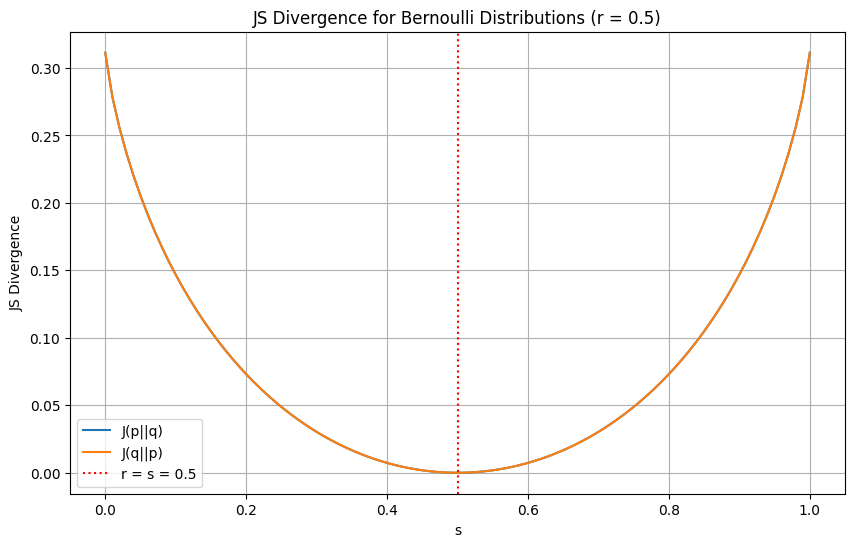

In [210]:
r = 0.5
s_values = np.linspace(0, 1, 100)
explore_js_divergence(r, s_values)

Both graphs coincide indicating that JS_Divergence is Symmetric

In [211]:
image1_path = "left.png"  
image2_path = "right.png"  
J_pq, J_qp = js_divergence_images(image1_path, image2_path)
print(f"JS Divergence J(p||q): {J_pq:.6f}")
print(f"JS Divergence J(q||p): {J_qp:.6f}")
D_pq, D_qp = kl_divergence_images(image1_path, image2_path)
print(f"KL Divergence D(p||q): {D_pq:.6f}")
print(f"KL Divergence D(q||p): {D_qp:.6f}")


JS Divergence J(p||q): 0.003673
JS Divergence J(q||p): 0.003673
KL Divergence D(p||q): 0.015104
KL Divergence D(q||p): 0.014410


We can see from the above results that JS divergence is Symmetric in nature while KL Divergence is not.

JS Divergence of the image pair: 0.003673


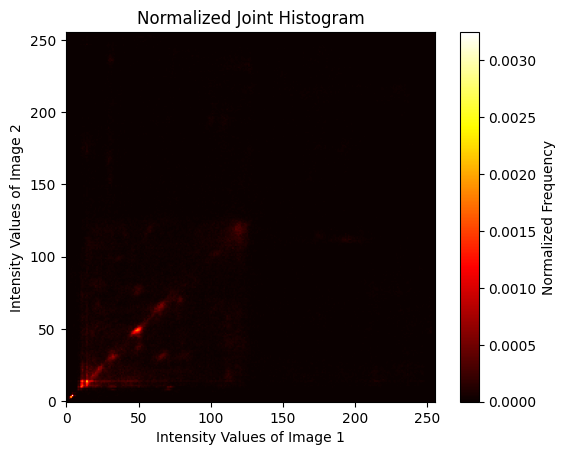

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def normalized_joint_histogram(image1, image2, bins=256):
    joint_histogram, x, y = np.histogram2d(image1.flatten(), image2.flatten(), bins=bins, range=[[0, 256], [0, 256]], density=True)
    return joint_histogram


def calculate_cross_entropy(image1_path, image2_path):
    image1 = Image.open(image1_path).convert('L')
    image2 = Image.open(image2_path).convert('L')
    
    image1 = np.array(image1)
    image2 = np.array(image2)
    
    marginal_hist1, _ = np.histogram(image1.flatten(), bins=256, range=[0, 256], density=True)
    marginal_hist2, _ = np.histogram(image2.flatten(), bins=256, range=[0, 256], density=True)
    
    ce = js_divergence(marginal_hist1, marginal_hist2)
    
    joint_hist = normalized_joint_histogram(image1, image2)
    
    return ce, joint_hist

image1_path = "left.png"  
image2_path = "right.png"

img_cross_entropy, joint_hist = calculate_cross_entropy(image1_path, image2_path)

print(f"JS Divergence of the image pair: {img_cross_entropy:.6f}")

plt.imshow(joint_hist, origin='lower', cmap='hot')
plt.colorbar(label='Normalized Frequency')
plt.title('Normalized Joint Histogram')
plt.xlabel('Intensity Values of Image 1')
plt.ylabel('Intensity Values of Image 2')
plt.show()

In [213]:
def check_joint_marginals(p_XY, r_X, s_Y):
    computed_r_X = np.sum(p_XY, axis=1)  
    computed_s_Y = np.sum(p_XY, axis=0)  

    return np.allclose(computed_r_X, r_X) and np.allclose(computed_s_Y, s_Y)


p_XY_positive = np.array([[0.1, 0.2],
                          [0.3, 0.4]])

r_X_positive = np.array([0.3, 0.7])
s_Y_positive = np.array([0.4, 0.6])


p_XY_negative = np.array([[0.2, 0.2],
                          [0.2, 0.4]])

r_X_negative = np.array([0.3, 0.7])
s_Y_negative = np.array([0.5, 0.5])

In [214]:
result_positive = check_joint_marginals(p_XY_positive, r_X_positive, s_Y_positive)
result_negative = check_joint_marginals(p_XY_negative, r_X_negative, s_Y_negative)

print(f"Positive example's result: {result_positive}")
print(f"Negative example's result: {result_negative}")

Positive example's result: True
Negative example's result: False


### Q2

a) 

i)Crowding Problem:The crowding problem arises when the available space in a low-dimensional representation is insufficient to properly map the moderately distant points, leading to overlap or compression in the center of the map.
Student t-distribution's Role:

ii) The Student t-distribution with one degree of freedom (Cauchy distribution) is used in t-SNE to better model large distances in low-dimensional space. This helps address the crowding problem by ensuring that similar points remain close while distant points are placed far apart.
Key Differences Between t-SNE and SNE:

iii) t-SNE uses a symmetric version of the SNE cost function and a Student t-distribution in low-dimensional space instead of a Gaussian. This allows it to better preserve local and global data structure.

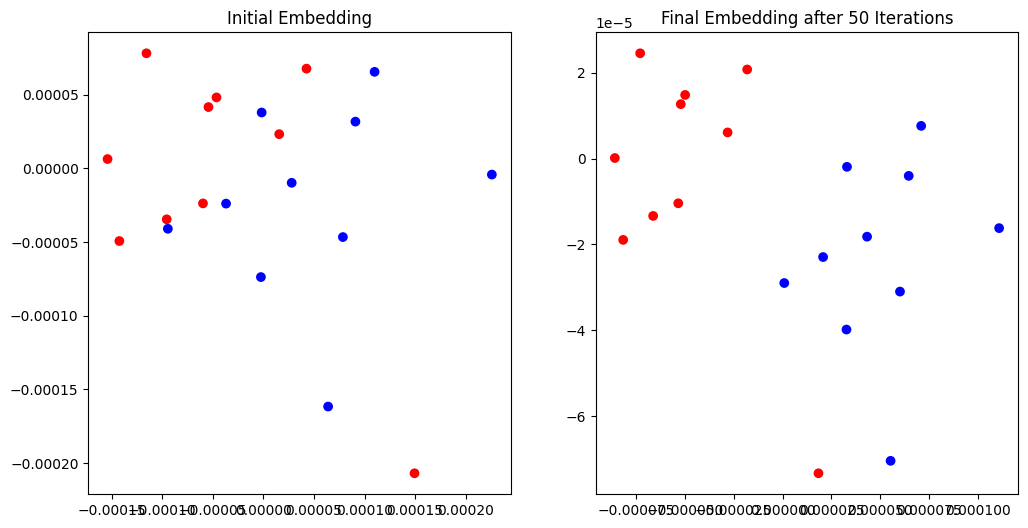

KL divergence at start: 108.01984795265729
KL divergence at end: 108.01984789929327
Observation: The KL divergence has decreased, indicating the low-dimensional embedding more accurately reflects the high-dimensional affinities after 50 iterations.


In [218]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)


mu1 = np.ones(10)
mu2 = 10 * np.ones(10)
cov = 0.01 * np.eye(10)


X1 = np.random.multivariate_normal(mu1, cov, 10)
X2 = np.random.multivariate_normal(mu2, cov, 10)
X = np.vstack((X1, X2))


n_points = X.shape[0]
dim_embedded = 2
T = 50  
eta = 0.02 
alpha = 0.3  


Y = np.random.randn(n_points, dim_embedded) * 0.0001

def compute_high_dim_affinities(X, sigma):
    n = X.shape[0]
    P = np.zeros((n, n))
    for i in range(n):
        diff = X[i] - X
        P[i, :] = np.exp(-np.sum(diff**2, axis=1) / (2 * sigma**2))
        P[i, i] = 0 
        P[i, :] /= np.sum(P[i, :])
    return P


def compute_low_dim_affinities(Y):
    n = Y.shape[0]
    Q = np.zeros((n, n))
    for i in range(n):
        diff = Y[i] - Y
        Q[i, :] = (1 + np.sum(diff**2, axis=1))**-1
        Q[i, i] = 0  
    Q /= np.sum(Q)
    return Q


def kl_divergence(P, Q):
    epsilon = 1e-10 
    P = np.clip(P, epsilon, None)
    Q = np.clip(Q, epsilon, None)
    return np.sum(P * np.log2(P / Q))


sigma = 1.0
P = compute_high_dim_affinities(X, sigma)


Y_history = [Y.copy()]


for t in range(T):
    Q = compute_low_dim_affinities(Y)
    

    PQ_diff = P - Q
    gradient = np.zeros_like(Y)
    for i in range(n_points):
        diff = Y[i] - Y
        dist_sq = np.sum(diff**2, axis=1)
        gradient[i] = np.sum((PQ_diff[i, :, np.newaxis] * diff / (1 + dist_sq)[:, np.newaxis]), axis=0)
    

    gradient = np.clip(gradient, -5, 5)
    

    Y_update = -eta * gradient + alpha * (Y - Y_history[-1])
    Y = Y + Y_update
    

    Y_history.append(Y.copy())


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(Y_history[0][:, 0], Y_history[0][:, 1], c=['blue'] * 10 + ['red'] * 10)
plt.title('Initial Embedding')


plt.subplot(1, 2, 2)
plt.scatter(Y[:, 0], Y[:, 1], c=['blue'] * 10 + ['red'] * 10)
plt.title('Final Embedding after 50 Iterations')

plt.show()


Q_initial = compute_low_dim_affinities(Y_history[0])
D_initial = kl_divergence(P, Q_initial)

Q_final = compute_low_dim_affinities(Y_history[-1])
D_final = kl_divergence(P, Q_final)


print(f"KL divergence at start: {D_initial}")
print(f"KL divergence at end: {D_final}")

if D_final < D_initial:
    print("Observation: The KL divergence has decreased, indicating the low-dimensional embedding more accurately reflects the high-dimensional affinities after 50 iterations.")
else:
    print("Observation: The KL divergence did not decrease as expected.")


Initial Plot (Iteration 0): At the beginning, the points in the low-dimensional space are randomly dispersed due to the random initialization of Y. There is no evident structure or distinct separation between clusters.

Final Plot (After 50 Iterations): By the 50th iteration, clear clusters have formed in the low-dimensional space. The two groups of points, representing the clusters in the high-dimensional space, are more distinct and separate. Points within each cluster are closer together, reflecting their relationships in the high-dimensional space, while the clusters themselves are farther apart, demonstrating clear separation.

Key Observation: The t-SNE algorithm effectively uncovers the data's underlying structure, grouping the points into clear, interpretable clusters by the final iteration. The separation between clusters improves significantly, and the local structure within each cluster is preserved.

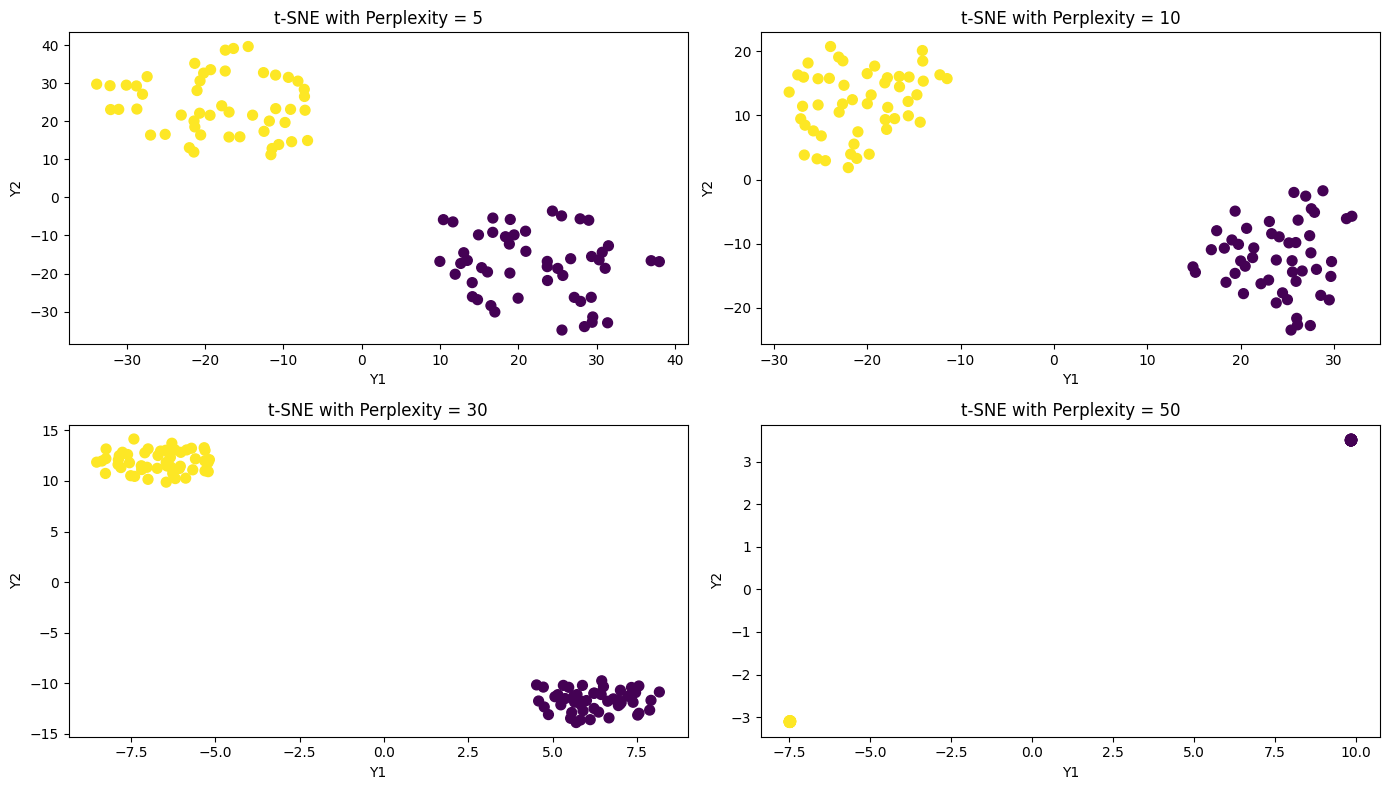

In [220]:
from sklearn.manifold import TSNE

np.random.seed(0)
mean1 = np.ones(10)  
mean2 = 10 * np.ones(10)  
cov = 0.01 * np.eye(10)  

cluster1 = np.random.multivariate_normal(mean1, cov, 50)  
cluster2 = np.random.multivariate_normal(mean2, cov, 50)  

X = np.vstack((cluster1, cluster2))  
labels = np.concatenate([np.zeros(50), np.ones(50)])  

perplexities = [5, 10, 30, 50]


plt.figure(figsize=(14, 8))

for i, perplexity in enumerate(perplexities, 1):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    Y_tsne = tsne.fit_transform(X)  
    

    plt.subplot(2, 2, i)
    plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"t-SNE with Perplexity = {perplexity}")
    plt.xlabel("Y1")
    plt.ylabel("Y2")

plt.tight_layout()
plt.show()


### Observations for Perplexity = 5
- With a low perplexity of 5, the t-SNE plot emphasizes local relationships.
- The clusters are very compact, with points tightly grouped within each cluster.
- The overall global structure is less distinct, and the separation between clusters is not very pronounced.


### Observations for Perplexity = 15
- A perplexity value of 15 provides a good balance between local and global structures.
- Points within each cluster are well-separated, and the clusters themselves are more clearly defined compared to a perplexity of 5.
- This setting effectively visualizes both local and broader relationships.


### Observations for Perplexity = 30
- At a perplexity of 30, the plot shows clear separation between clusters while also highlighting global relationships.
- The clusters become more distinct, and the plot starts to reveal how clusters relate to each other on a larger scale.
- Some local details may become less clear as the emphasis shifts towards global structure.


### Observations for Perplexity = 50
- With a high perplexity of 50, the focus is mainly on the global structure.
- Clusters may appear more dispersed, and fine details within each cluster are often blurred or less defined.
- This setting is useful for understanding broader relationships in the data but loses detailed local patterns.
